Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Reading Dataset And Get Info

In [18]:
data= pd.read_csv(r'..\dataset\gld_price_data.csv')

In [19]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [21]:
data.shape

(2290, 6)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [23]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Handling Missing Data & Duplicates

In [24]:
data.duplicated().sum()

0

In [25]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

EDA of Data and Get Insights

In [26]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as index for time series visualization
data.set_index('Date', inplace=True)

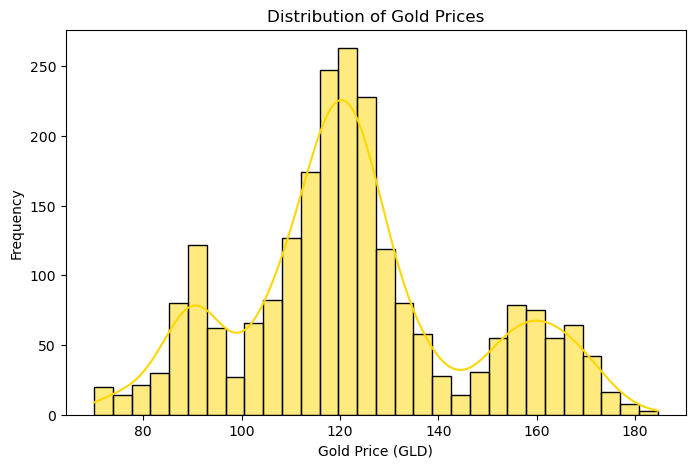

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data['GLD'], bins=30, kde=True, color='gold')
plt.xlabel('Gold Price (GLD)')
plt.ylabel('Frequency')
plt.title('Distribution of Gold Prices')
plt.show()

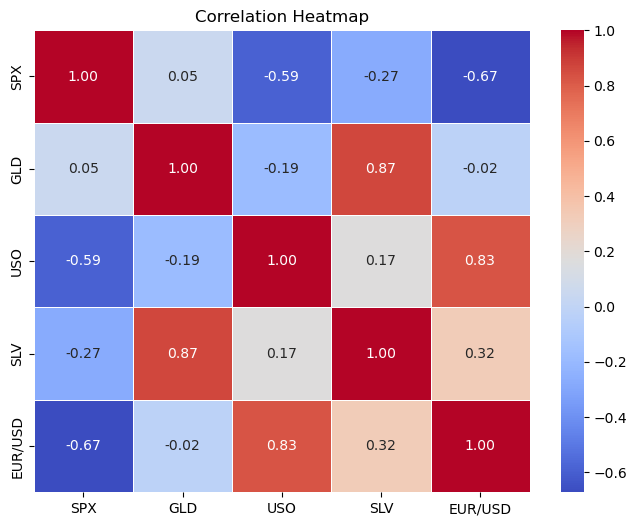

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

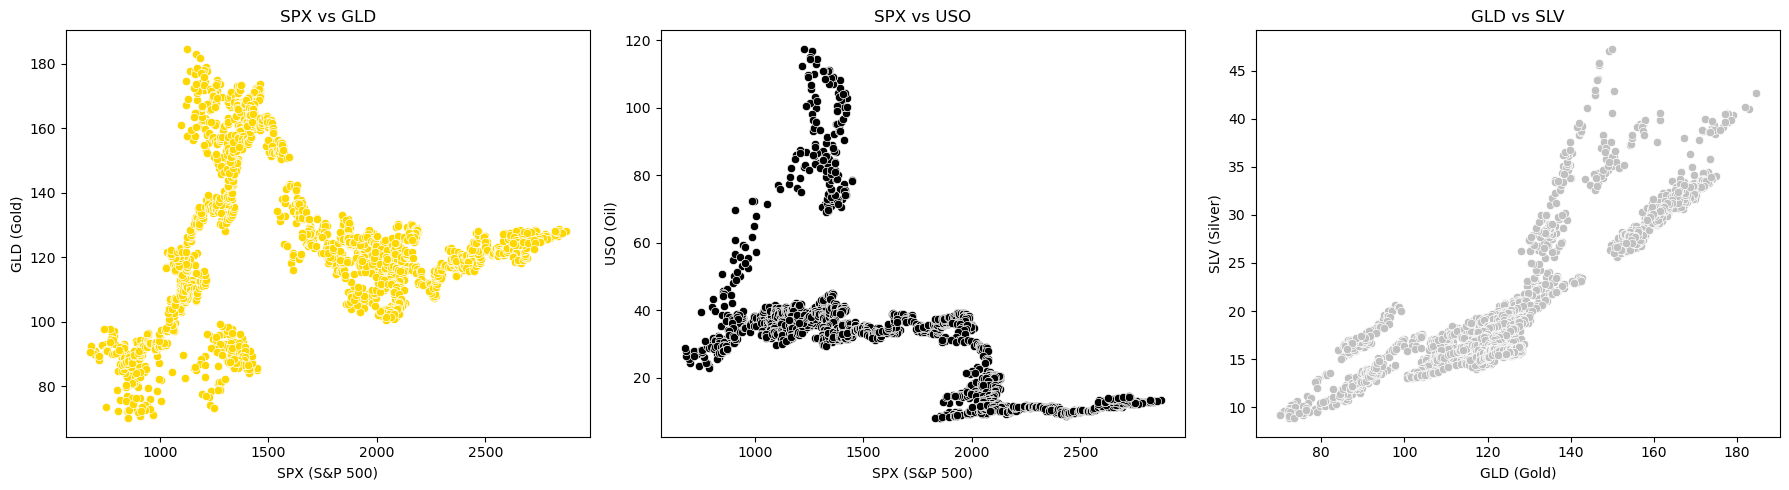

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SPX vs GLD
sns.scatterplot(x=data['SPX'], y=data['GLD'], ax=axes[0], color='gold')
axes[0].set_title('SPX vs GLD')
axes[0].set_xlabel('SPX (S&P 500)')
axes[0].set_ylabel('GLD (Gold)')

# SPX vs USO
sns.scatterplot(x=data['SPX'], y=data['USO'], ax=axes[1], color='black')
axes[1].set_title('SPX vs USO')
axes[1].set_xlabel('SPX (S&P 500)')
axes[1].set_ylabel('USO (Oil)')

# GLD vs SLV
sns.scatterplot(x=data['GLD'], y=data['SLV'], ax=axes[2], color='silver')
axes[2].set_title('GLD vs SLV')
axes[2].set_xlabel('GLD (Gold)')
axes[2].set_ylabel('SLV (Silver)')

plt.tight_layout()
plt.show()


Data Preprocessing

In [ ]:
#Make the GLD last Column
GLD=data['GLD']
data.drop(columns='GLD',axis=1,inplace=True)
data['GLD']=GLD


In [31]:
data.head()

,SPX,USO,SLV,EUR/USD,GLD
Date,,,,,
2008-01-02,1447.160034,78.470001,15.180,1.471692,84.860001
2008-01-03,1447.160034,78.370003,15.285,1.474491,85.570000
2008-01-04,1411.630005,77.309998,15.167,1.475492,85.129997
2008-01-07,1416.180054,75.500000,15.053,1.468299,84.769997
2008-01-08,1390.189941,76.059998,15.590,1.557099,86.779999


In [32]:
#Assign feature and target variables
X=data.drop(columns='GLD',axis=1)
Y=data['GLD']

In [33]:
#Splitting Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {Y_train.shape}')
print(f'Shape of Y_Test {Y_test.shape}')

Shape of X_Train (1832, 4)
Shape of X_Test (458, 4)
Shape of Y_Train (1832,)
Shape of Y_Test (458,)


Modeling

In [35]:
model=RandomForestRegressor(n_estimators=100,max_depth=10)
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10)

In [36]:
y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred) 
print('Model Performance Metrics:')
print("Mean_squared_error :",mse)
print("Root mean_squared_error :",rmse)
print("Mean_absolute_error :",mae)
print("R2_score :",r2)

Model Performance Metrics:
Mean_squared_error : 5.975552762918055
Root mean_squared_error : 2.444494377763642
Mean_absolute_error : 1.3162931703728327
R2_score : 0.9891016708006797


C:\Users\hp\AppData\Local\Temp\ipykernel_1240\2478842985.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance,palette="viridis")


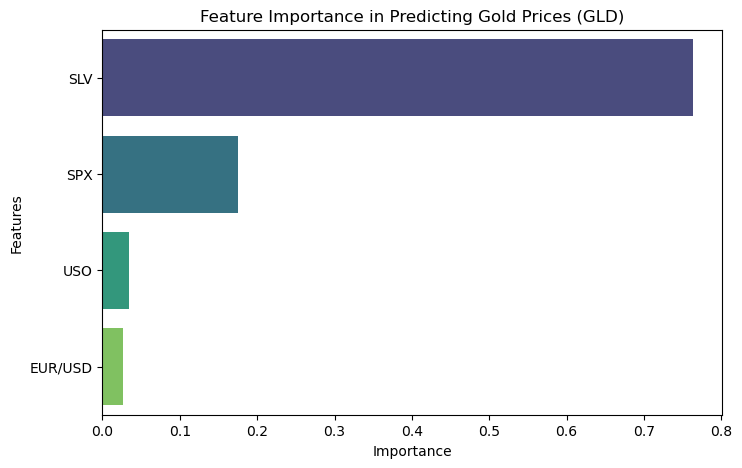

In [37]:
# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=feature_importance,palette="viridis")
plt.title('Feature Importance in Predicting Gold Prices (GLD)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Save the model 

In [ ]:
import pickle
pickle.dump(model, open('Gold_price_model.sav', 'wb'))